## Importing Libraries
- **torchvision** >> datasets that have to do with 'vision' (not used irl for the most part since you would want your own datasets)

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from PIL import Image
from PIL import ImageOps
import matplotlib.pyplot as plt

## Training/Testing Datasets

In [2]:
train = datasets.MNIST("", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

## Preprocessing Datasets

In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

## Seeing a Data Point

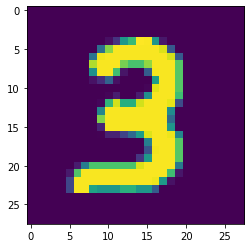

In [4]:
for data in trainset:
    break

x, y = data[0][0], data[1][0]

# shape needs to be something like 28 x 28:
plt.imshow(data[0][0].view(28, 28))
plt.show()

## Balancing Data
- what if 60% of our training data is "3", then the model is going to learn that the quickest way to decrease loss is change the weights to predict a "3". 

In [5]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, Ys = data
    for y in Ys:
        counter_dict[int(y)] += 1
        total += 1
        
for c in counter_dict:
    print(f"{c}: {(counter_dict[c]/total)*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


## Building a Model

In [6]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # "fc" means fully connected
        self.fc1 = nn.Linear(784, 64)  # 784 = 28*28, 64 neurons for 3 hidden layers
        self.fc2 = nn.Linear(64, 64)  # output can be anything
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)  # THIS is the OUTPUT layer; we have 10 CLASSES (0-9)

    def forward(self, x):
        "relu is the activation function"
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)  # what var do we want to sum the distributions to 1
                  
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


## Optimizing & Testing Model

### Sample Output

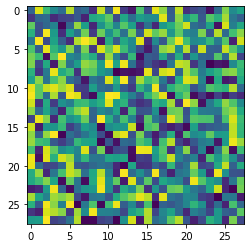

In [7]:
X = torch.rand((28, 28))
X = X.view(-1, 28*28)  # -1 specifies that the input could be of varying shapes
output = net(X)
plt.imshow(X.view(28, 28))
plt.show()

### Loss
- Measure of how wrong the predictions were 
- We want the loss to decrease over samples

### Optimize 
- adjusts weights with the aim to lower loss
    - based on learning rate we utilize

In [8]:
optimizer = optim.Adam(net.parameters(), lr=0.001)  # can help restrict model from adjusting weights of prefered layers
                                        # learning rate: size of step taken by optimizer to best adjust weights
EPOCHS = 3  # 3 whole passes through the dataset

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()  # back propogating loss
        optimizer.step()  # to adjust the weights

## Showing Accuracy of Model

In [9]:
correct = 0
total = 0 

with torch.no_grad():  # evaluating the model, so we don't want to calculate loss
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 784))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Number Correct:", correct, "out of:", total)
print("Accuracy: ", round(correct/total, 3))

Number Correct: 58333 out of: 60000
Accuracy:  0.972


torch.Size([1, 28, 28])


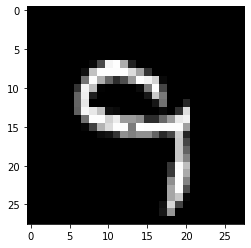

tensor(9, grad_fn=<NotImplemented>)


In [10]:
print(X[2].shape)
plt.imshow(X[2].view(28, 28), cmap='gray')
plt.show()
# prediction
print(torch.argmax(net(X[2].view(-1, 784))[0]))

## TESTING ON UNSEEN IMAGES

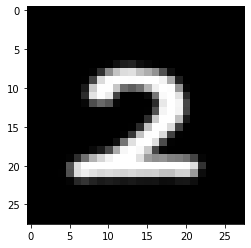

tensor(2, grad_fn=<NotImplemented>)


In [11]:
p = transforms.Compose([transforms.Resize((28,28))])

test_img = Image.open('C:\\Users\\mistr\\AppData\\Local\\Programs\\Python\\Python37\\Scripts\\Machine Learning Projects\\Deep Learning\\two_test.jpeg')

if test_img.mode == 'RGBA':
    r, g, b, a = test_img.split()
    rgb = Image.merge('RGB', (r, g, b))
    inv = ImageOps.invert(rgb)
    r, g, b = inv.split()
    test_img = Image.merge('RGBA', (r, g, b, a))
else:
    test_img = ImageOps.invert(test_img)

test_img = p(test_img)
t = transforms.Compose([transforms.ToTensor()])
test_img_tensor = t(test_img)
test_img_tensor = test_img_tensor.view(-1, 28 * 28)
plt.imshow(test_img_tensor[1].view(28, 28), cmap='gray')
plt.show()
# prediction
print(torch.argmax(net(test_img_tensor[1].view(-1, 784))[0]))

# PYGAME HAND-WRITTEN DIGIT RECOGNIZER

In [12]:
import pygame

# Initializing pygame
pygame.init()

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


(6, 0)

In [49]:
# finals
SCREEN_WIDTH = 700
SCREEN_HEIGHT = 600

# colors
BG_COLOR = (0, 0, 0)
WHITE = (255, 255, 255)
SAVE_BTN = (124, 205, 235)
SAVE_FONT = (255, 82, 99)
NUMBER_LABEL = (242, 238, 111)

# Setting up main screen
display = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
pygame.display.set_caption("Digit Recognition - MNIST")
display.fill(BG_COLOR)

class Spot:
    def __init__(self, pos_x=0, pos_y=0, color=WHITE):
        # validating whether the coordinates of the spots will fit in the grid
        if pos_x <= SCREEN_WIDTH - 20:
            self.pos_x = pos_x
        else:
            self.pos_x = 0
        if pos_y <= SCREEN_HEIGHT - 20:
            self.pos_y = pos_y
        else:
            self.pos_y = 0
        self.color = color
            
    def draw(self):
        """this method will draw the spot on the grid"""
        pygame.draw.rect(display, self.color, [self.pos_x, self.pos_y, 20, 20])
        

# drawing save button
def draw_save():
    pygame.draw.rect(display, SAVE_BTN, [0, 560, 700, 40])
    font = pygame.font.Font('freesansbold.ttf', 20)
    save_text = font.render("SAVE", True, SAVE_FONT)
    text_rect = save_text.get_rect()
    text_rect.center = (350, 580)
    display.blit(save_text, text_rect)    

    
# drawing identified number
def draw_identified_number(num):
    pygame.draw.rect(display, NUMBER_LABEL, [0, 0, 700, 40])
    font = pygame.font.Font('freesansbold.ttf', 35)
    num_text = font.render(str(num), True, SAVE_FONT)
    text_rect = num_text.get_rect()
    text_rect.center = (340, 20)
    display.blit(num_text, text_rect) 
    
    
# number spots
number_spots = []

once = False
        
# run loop for pygame
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
    
    # adding obstacles with left-click
    if pygame.mouse.get_pressed()[0]:
        if ((event.pos[1] // 20) * 20 < 560) and ((event.pos[1] // 20) * 20 > 40):
            number_spots.append(((event.pos[0] // 20) * 20, (event.pos[1] // 20) * 20))
            once = False
        try:
            # number spot instance
            number_spot = Spot(number_spots[-1][0], number_spots[-1][1])
            number_spot.draw()
        except IndexError:
            pass
    # removing obstacles with right-click
    if pygame.mouse.get_pressed()[2]:
        if ((event.pos[0] // 20) * 20, (event.pos[1] // 20) * 20) in number_spots:
            number_spots.remove(((event.pos[0] // 20) * 20, (event.pos[1] // 20) * 20))
            Spot(pos_x=(event.pos[0] // 20) * 20, pos_y=(event.pos[1] // 20) * 20, color=BG_COLOR).draw()
    
    # detecting save btn click
    if pygame.mouse.get_pressed()[0]:
        if ((event.pos[1] // 20) * 20 >= 560):
            if not once:
                # saving drawn image
                pygame.image.save(display, "drawn_number.jpeg")
                # RECOGNIZING THE NUMBER DRAWN
                # grabbing the saved image
                test_img = Image.open('drawn_number.jpeg')
                # cropping the image to not include the blue save btn on the bottom
                border = (0, 40, 700, 560)
                test_img = test_img.crop(border)
                # resizing the image to a 28 x 28
                p = transforms.Compose([transforms.Resize((28, 28))])
                test_img = p(test_img)
                # prediction
                t = transforms.Compose([transforms.ToTensor()])
                test_img_tensor = t(test_img)
                test_img_tensor = test_img_tensor.view(-1, 28 * 28)
                x = torch.argmax(net(test_img_tensor[1].view(-1, 784))[0]).item()
                display.fill(BG_COLOR)
                draw_identified_number(x)
                number_spots.clear()
                once = True
    
    # drawing save button
    draw_save()    
    
    # updating pygame
    pygame.display.update()
pygame.display.quit()